In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Define range of k values
k_values = range(1, 22)
train_accuracies = []
test_accuracies = []

In [5]:
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    # Accuracy on training and test sets
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

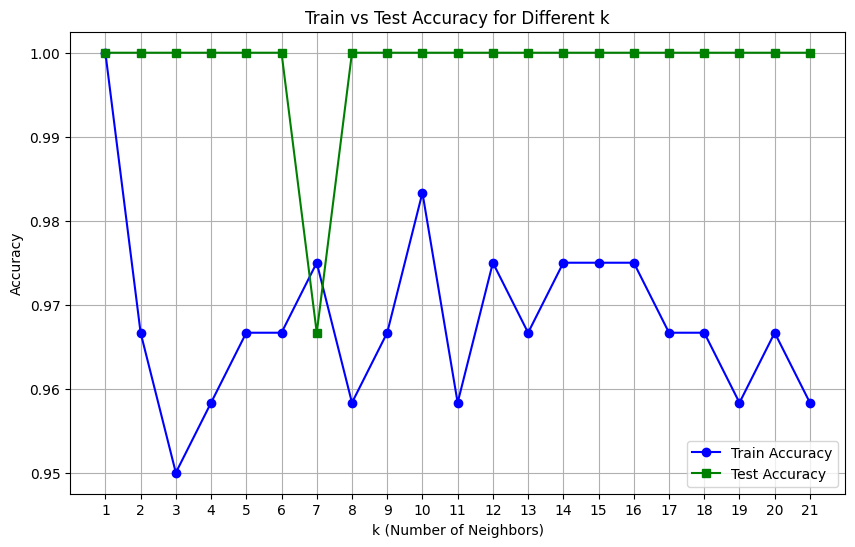

In [6]:
# Plot accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, marker='o', label='Train Accuracy', color='blue')
plt.plot(k_values, test_accuracies, marker='s', label='Test Accuracy', color='green')
plt.title("Train vs Test Accuracy for Different k")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Choose a specific k
chosen_k = 7

In [8]:
# Train final model with chosen k
final_model = KNeighborsClassifier(n_neighbors=chosen_k)
final_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [9]:
# Predictions
train_preds = final_model.predict(X_train)
test_preds = final_model.predict(X_test)

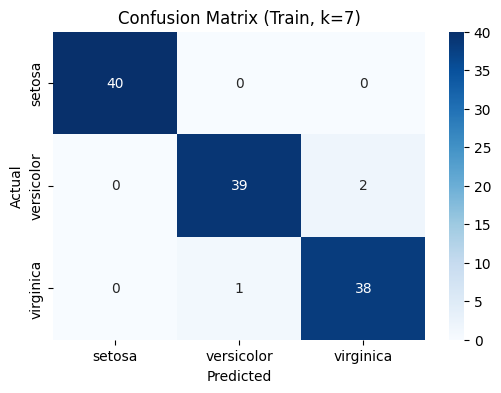

In [10]:
# 📊 Confusion Matrix – Train
cm_train = confusion_matrix(y_train, train_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title(f"Confusion Matrix (Train, k={chosen_k})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

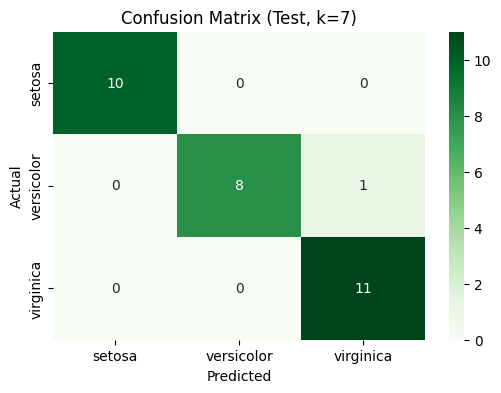

In [11]:
# 📊 Confusion Matrix – Test
cm_test = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Greens", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title(f"Confusion Matrix (Test, k={chosen_k})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [12]:
# 📄 Classification Report – Train
print(f"\nClassification Report (Train, k={chosen_k}):\n")
print(classification_report(y_train, train_preds, target_names=iris.target_names))


Classification Report (Train, k=7):

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.95      0.96        41
   virginica       0.95      0.97      0.96        39

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



In [13]:
# 📄 Classification Report – Test
print(f"\nClassification Report (Test, k={chosen_k}):\n")
print(classification_report(y_test, test_preds, target_names=iris.target_names))


Classification Report (Test, k=7):

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

